# Question-01- Delivery_time

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Data Visualization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


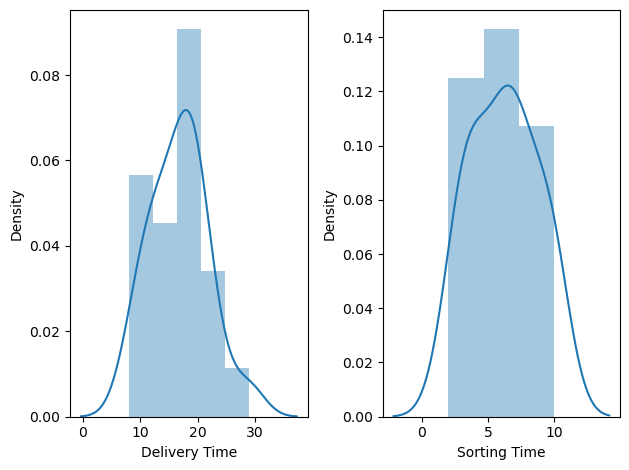

In [4]:
plt.subplot(1,2,1)
sns.distplot(dataset['Delivery Time'])
plt.subplot(1,2,2)
sns.distplot(dataset['Sorting Time'])
plt.tight_layout()

## Feature Engineering

In [5]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Correlation Analysis

In [6]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

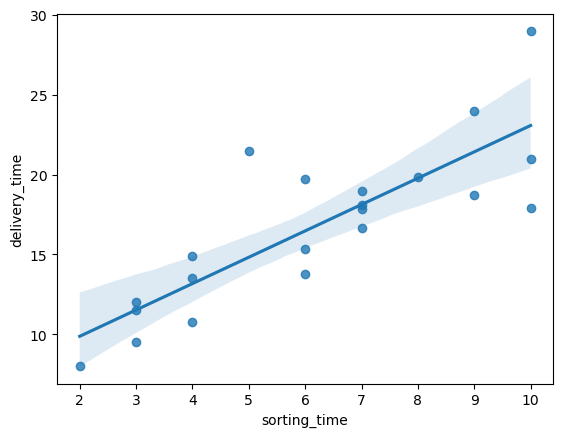

In [7]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

## Model Building

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset['delivery_time'],dataset['sorting_time'], test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()


In [10]:
x_train= X_train.values
x_test= X_test.values
y_train= y_train.values
y_test= y_test.values

In [11]:
model.fit(pd.DataFrame(x_train),pd.DataFrame(y_train))

LinearRegression()

In [12]:
y_pred=model.predict(pd.DataFrame(x_test))
y_pred

array([[7.55049807],
       [6.46609809],
       [5.25412164],
       [4.73631127],
       [6.38730086]])

In [13]:

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.7173071781664517


In [14]:
# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 4.290336284603159


In [15]:
# Calculate Root Mean Squared Error (RMSE)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 2.071312695998158


# log and sqrt Transformation

In [16]:
dataset['sorting_time'].skew()

0.047115474210530174

In [17]:
dataset['log_sorting_time']=np.log(dataset['sorting_time'])
dataset

,delivery_time,sorting_time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585
5,15.35,6,1.791759
6,19.00,7,1.945910
7,9.50,3,1.098612
8,17.90,10,2.302585
9,18.75,9,2.197225


In [18]:
dataset['log_sorting_time'].skew()

-0.6052357185134765

In [19]:
dataset['sqrt_sorting_time']=np.sqrt(dataset['sorting_time'])
dataset

,delivery_time,sorting_time,log_sorting_time,sqrt_sorting_time
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278
5,15.35,6,1.791759,2.449490
6,19.00,7,1.945910,2.645751
7,9.50,3,1.098612,1.732051
8,17.90,10,2.302585,3.162278
9,18.75,9,2.197225,3.000000


In [20]:
dataset['log_delivery_time']= np.log(dataset['delivery_time'])
dataset['sqrt_delivery_time']= np.sqrt(dataset['delivery_time'])
dataset

,delivery_time,sorting_time,log_sorting_time,sqrt_sorting_time,log_delivery_time,sqrt_delivery_time
0,21.00,10,2.302585,3.162278,3.044522,4.582576
1,13.50,4,1.386294,2.000000,2.602690,3.674235
2,19.75,6,1.791759,2.449490,2.983153,4.444097
3,24.00,9,2.197225,3.000000,3.178054,4.898979
4,29.00,10,2.302585,3.162278,3.367296,5.385165
5,15.35,6,1.791759,2.449490,2.731115,3.917908
6,19.00,7,1.945910,2.645751,2.944439,4.358899
7,9.50,3,1.098612,1.732051,2.251292,3.082207
8,17.90,10,2.302585,3.162278,2.884801,4.230839
9,18.75,9,2.197225,3.000000,2.931194,4.330127


In [21]:
sqrt_sorting_time_skew=-0.25981634723613994
log_sorting_time_skew= -0.6052357185134765
sorting_time_skew= 0.047115474210530174
delivery_time_skew=0.3523900822831107
log_delivery_time_skew=-0.4512901148522999
sqrt_delivery_time_skew=-0.0618105135865213

# Question-02-Salary_hike

In [22]:
# import dataset
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and Data Visualization 

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


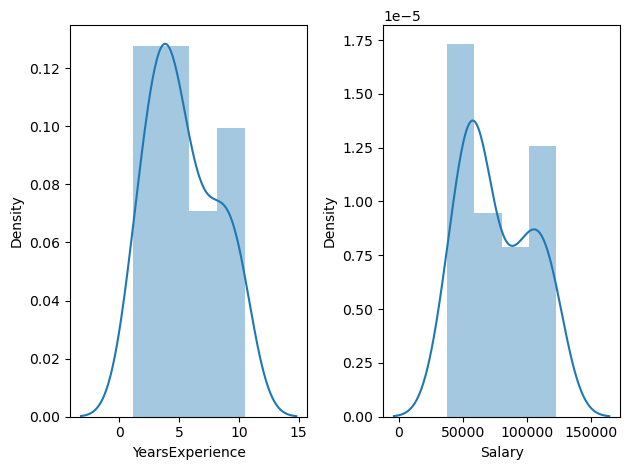

In [24]:
plt.subplot(1,2,1)
sns.distplot(dataset['YearsExperience'])
plt.subplot(1,2,2)
sns.distplot(dataset['Salary'])
plt.tight_layout()

## Correlation Analysis 

In [25]:
corr=dataset.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

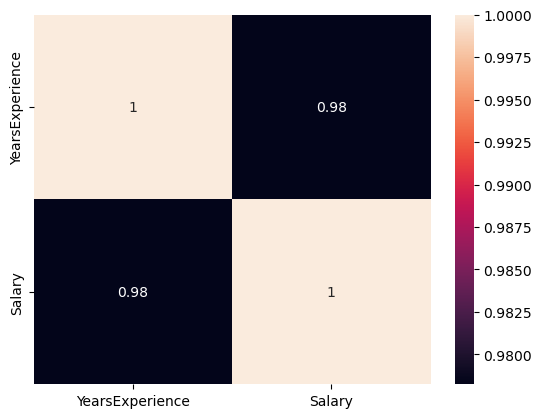

In [26]:
sns.heatmap(corr,annot=True)


<Axes: xlabel='YearsExperience', ylabel='Salary'>

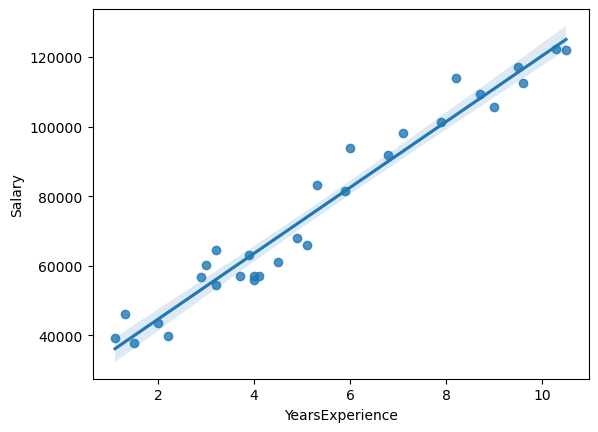

In [27]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

## Model Building 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(dataset['YearsExperience'],dataset['Salary'], test_size=0.2, random_state=42)

In [29]:
x_train=X_train.values
x_test=X_test.values
y_train=y_train.values
y_test.values

array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

In [30]:
model=LinearRegression()
model.fit(pd.DataFrame(x_train),pd.DataFrame(y_train))

LinearRegression()

In [31]:
y_pred=model.predict(pd.DataFrame(x_test))
y_pred

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [32]:
# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 6286.453830757749


In [33]:
# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 49830096.85590839


In [34]:
# Calculate Root Mean Squared Error (RMSE)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 7059.04362190151
